## Objective

- Calculating basics statistics (mean, variance) of word frequencies
- Visualizing the ferquency dstribution of common words
- Comparing observed word frequencies with expected distributions (eg : normal or Poisson)
- Drawing insights about word usage patterns in the dataset

### Dataset
Text of "Alice in Wonderland " by Lewis Carroll.

In [1]:
import re
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

In [2]:
#text sample

large_text = """Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do: once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, `and what is the use of a book,' thought Alice `without pictures or conversation?'
So she was considering in her own mind (as well as she could, for the hot day made her feel very sleepy and stupid), whether the pleasure of making a daisy-chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her.

There was nothing so very remarkable in that; nor did Alice think it so very much out of the way to hear the Rabbit say to itself, `Oh dear! Oh dear! I shall be late!' (when she thought it over afterwards, it occurred to her that she ought to have wondered at this, but at the time it all seemed quite natural); but when the Rabbit actually took a watch out of its waistcoat-pocket, and looked at it, and then hurried on, Alice started to her feet, for it flashed across her mind that she had never before seen a rabbit with either a waistcoat-pocket, or a watch to take out of it, and burning with curiosity, she ran across the field after it, and fortunately was just in time to see it pop down a large rabbit-hole under the hedge.

In another moment down went Alice after it, never once considering how in the world she was to get out again.

The rabbit-hole went straight on like a tunnel for some way, and then dipped suddenly down, so suddenly that Alice had not a moment to think about stopping herself before she found herself falling down a very deep well.

Either the well was very deep, or she fell very slowly, for she had plenty of time as she went down to look about her and to wonder what was going to happen next. First, she tried to look down and make out what she was coming to, but it was too dark to see anything; then she looked at the sides of the well, and noticed that they were filled with cupboards and book-shelves; here and there she saw maps and pictures hung upon pegs. She took down a jar from one of the shelves as she passed; it was labelled `ORANGE MARMALADE', but to her great disappointment it was empty: she did not like to drop the jar for fear of killing somebody, so managed to put it into one of the cupboards as she fell past it.

`Well!' thought Alice to herself, `after such a fall as this, I shall think nothing of tumbling down stairs! How brave they'll all think me at home! Why, I wouldn't say anything about it, even if I fell off the top of the house!' (Which was very likely true.)

Down, down, down. Would the fall never come to an end! `I wonder how many miles I've fallen by this time?' she said aloud. `I must be getting somewhere near the centre of the earth. Let me see: that would be four thousand miles down, I think--' (for, you see, Alice had learnt several things of this sort in her lessons in the schoolroom, and though this was not a very good opportunity for showing off her knowledge, as there was no one to listen to her, still it was good practice to say it over) `--yes, that's about the right distance--but then I wonder what Latitude or Longitude I've got to?' (Alice had no idea what Latitude was, or Longitude either, but thought they were nice grand words to say.)

Presently she began again. `I wonder if I shall fall right through the earth! How funny it'll seem to come out among the people that walk with their heads downward! The Antipathies, I think--' (she was rather glad there was no one listening, this time, as it didn't sound at all the right word) `--but I shall have to ask them what the name of the country is, you know. Please, Ma'am, is this New Zealand or Australia?' (and she tried to curtsey as she spoke--fancy curtseying as you're falling through the air! Do you think you could manage it?) `And what an ignorant little girl she'll think me for asking! No, it'll never do to ask: perhaps I shall see it written up somewhere.'

Down, down, down. There was nothing else to do, so Alice soon began talking again. `Dinah'll miss me very much to-night, I should think!' (Dinah was the cat.) `I hope they'll remember her saucer of milk at tea-time. Dinah my dear! I wish you were down here with me! There are no mice in the air, I'm afraid, but you might catch a bat, and that's very like a mouse, you know. But do cats eat bats, I wonder?' And here Alice began to get rather sleepy, and went on saying to herself, in a dreamy sort of way, `Do cats eat bats? Do cats eat bats?' and sometimes, `Do bats eat cats?' for, you see, as she couldn't answer either question, it didn't much matter which way she put it. She felt that she was dozing off, and had just begun to dream that she was walking hand in hand with Dinah, and saying to her very earnestly, `Now, Dinah, tell me the truth: did you ever eat a bat?' when suddenly, thump! thump! down she came upon a heap of sticks and dry leaves, and the fall was over."""

#Write the text to a file named "alice_in_wonderland.txt"
with open ("alice_in_wonderlands.txt", "w") as file:
    file.write(large_text)

print("Large sample file 'alice_in_wonderlands.txt created successfully'")

Large sample file 'alice_in_wonderlands.txt created successfully'


In [3]:
#load the text data
with open ("alice_in_wonderlands.txt", "r") as file :
    text = file.read()


In [4]:
#preprocess the text

text = text.lower()
text = re.sub(r'[^\w\s]', '', text)
tokens = word_tokenize(text)


In [5]:
#display tokens
print(tokens[:20])

['alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothing', 'to']


## Step 2 : Calculate Word Frequencies
Calculate the frequency of each word in the corpus using the Counter class from the collections module

In [6]:
#calculate word frequency 
word_counts = Counter(tokens)

# Display the 10 most common words
print("Most common words :", word_counts.most_common(10))

Most common words : [('the', 39), ('to', 36), ('she', 31), ('and', 26), ('it', 25), ('was', 24), ('of', 21), ('a', 19), ('i', 17), ('down', 17)]


## Step 3 : Calculate basic statistical measures

In [8]:
import numpy as np

#Convert word frequencies to a list of counts
word_frequencies = list(word_counts.values())

# Calculate mean, variance, and standard deviation
mean_freq = np.mean(word_frequencies)
variance_freq = np.var(word_frequencies)
std_dev_freq = np.std(word_frequencies)

print(f"Mean Frequency : {mean_freq}")
print(f"Variance : {variance_freq}")
print(f"Strandard Deviation : {std_dev_freq}")




Mean Frequency : 2.6807909604519775
Variance : 20.67494174726292
Strandard Deviation : 4.546970612095807


## Step 4 : Visualize the word Frequency distribution

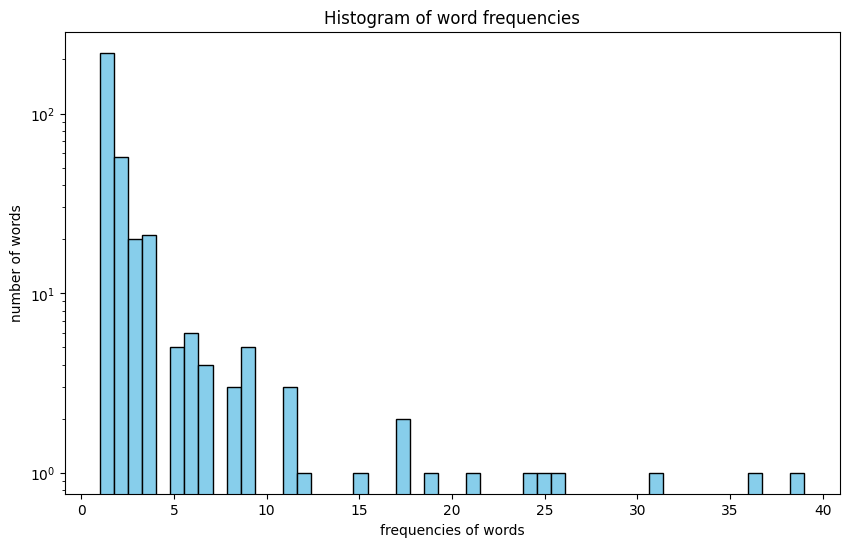

In [17]:
import matplotlib.pyplot as plt
 
# PLot histogram of word ferquencies

plt.figure(figsize = (10,6))
plt.hist(word_frequencies, bins = 50, color ="skyblue", edgecolor ="black" )
plt.title("Histogram of word frequencies")
plt.xlabel("frequencies of words")
plt.ylabel("number of words")
plt.yscale("log")
plt.show()